# Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga. 

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais. 

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.


#### Importando as bibliotecas

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly_express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

**Importando a base de dados**

In [3]:
dados = pd.read_excel(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\Recrutamento.xlsx')

#### Analisando os dados

In [4]:
display(dados.head(3))

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0


Inferência sobre os dados:

Métricas de pontuação sobre ensino:
ssc_p
hsc_p
degree_p
estet_p
mba_p

sl_no é um código, então não faz sentido na análise.

salary vem após a contratação.

In [5]:
print(dados.shape)

(215, 15)


In [6]:
set(dados.status)

{'No', 'Yes'}

In [7]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**Inferência sobre a base de dados:**

Podemos observar que temos algumas variáveis como: gênero, desempenho educacional, score de desempenho educacional, status de contratação, salário.

**Variável Target:** No nosso case a target é a coluna status.

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<Axes: >

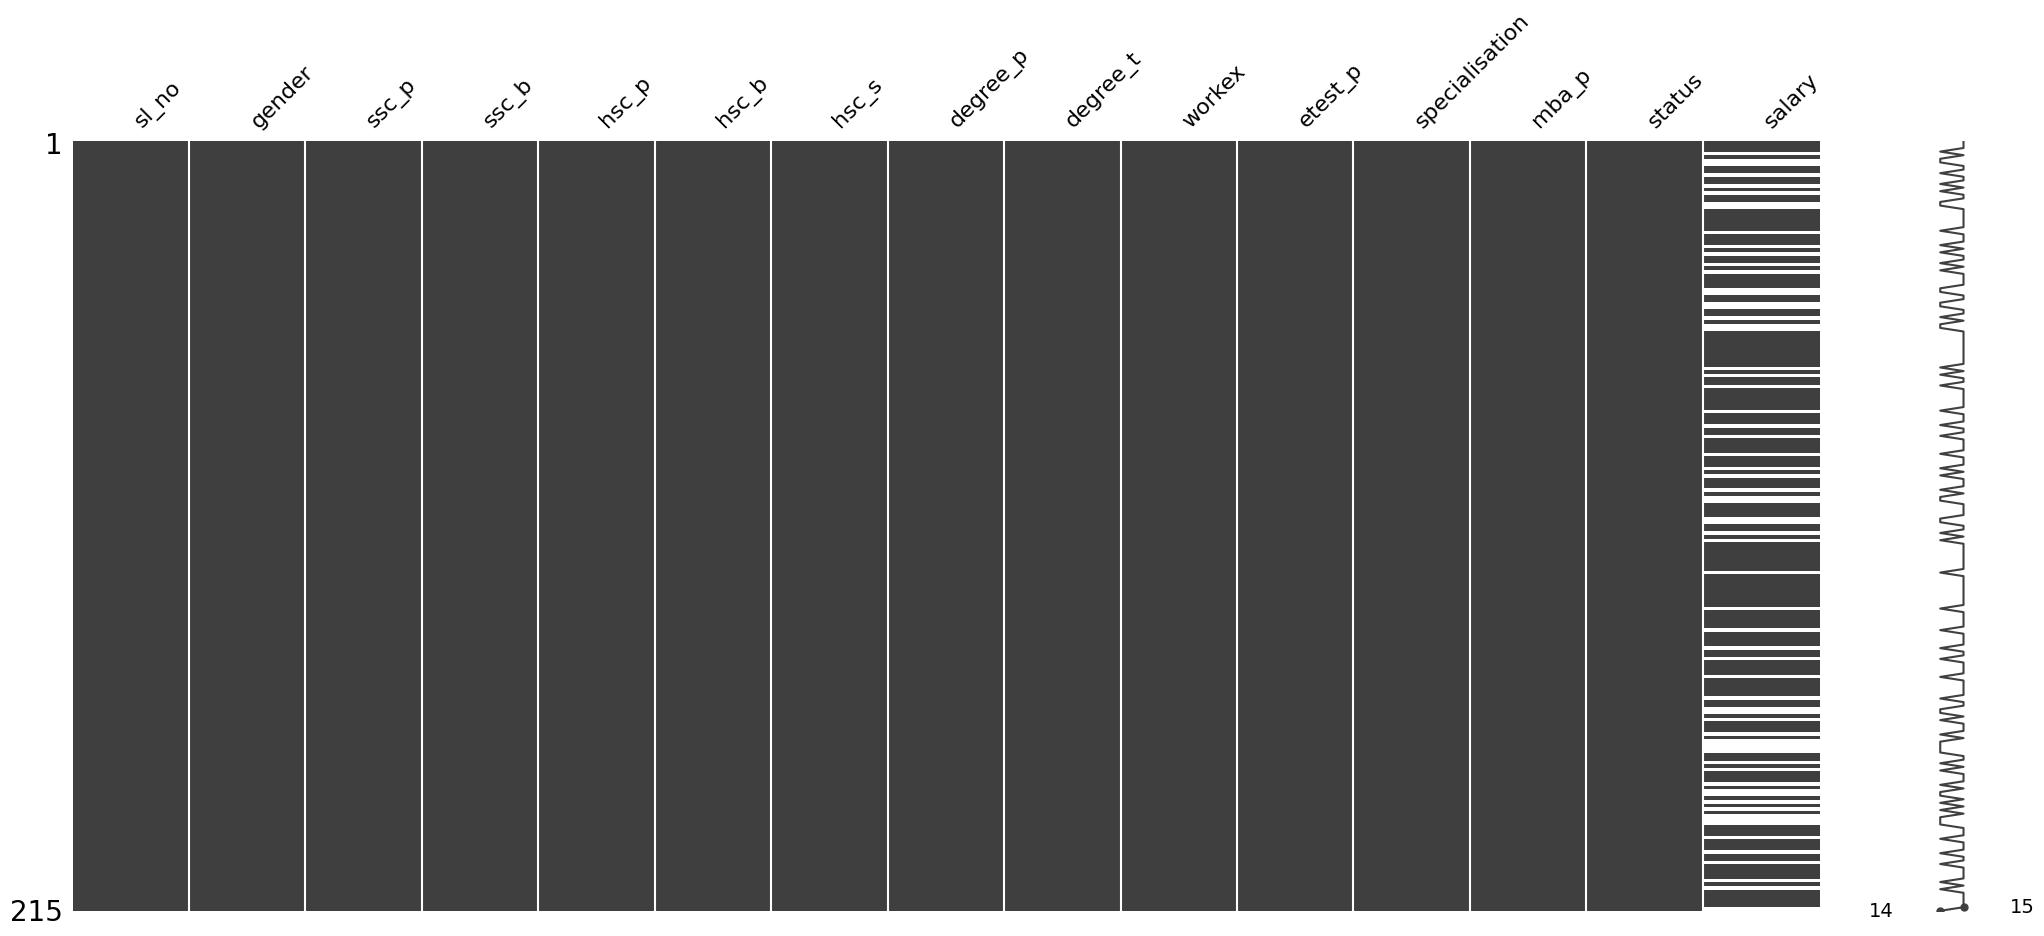

In [10]:
msno.matrix(dados)

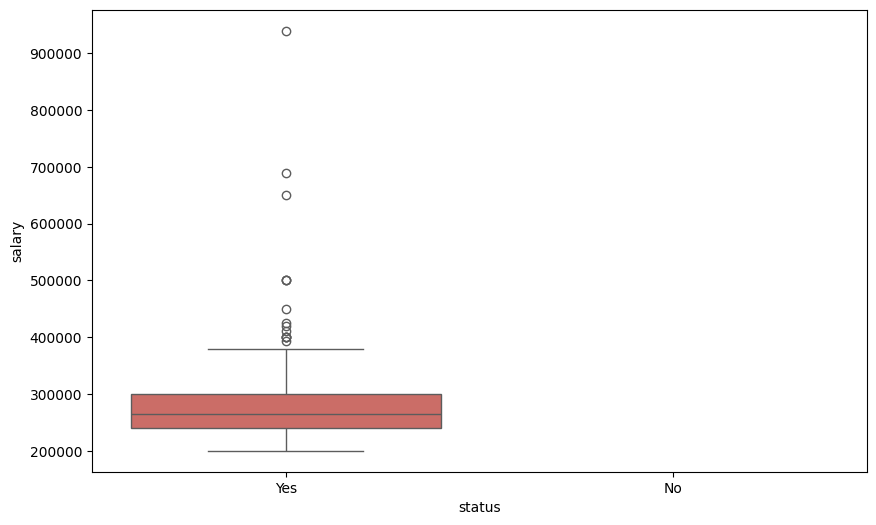

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=dados, x='status', y='salary', ax=ax, hue='status', palette='hls')
plt.show()

Inferência sobre os dados:

Observe que para a variável salário, os valores nulos estão atribuídos a variável do tipo status quando o status é "não", ou seja, para os não contratados temos algumas pessoas da base sem salário atribuído.

Como podemos realizar a tratativa dos valores nulos?

In [12]:
dados['salary'].fillna(value=0, inplace=True)

In [13]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Analisando as variáveis numéricas: 

Vamos analisar e compreender a distribuição dos dados para cada métrica de pontuação de ensino. Será que temos outliers na base?

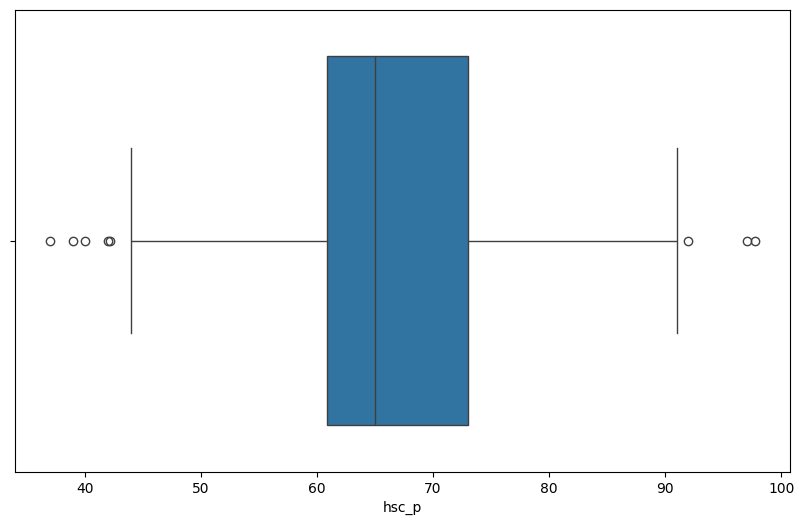

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=dados, x=dados['hsc_p'])
plt.show()

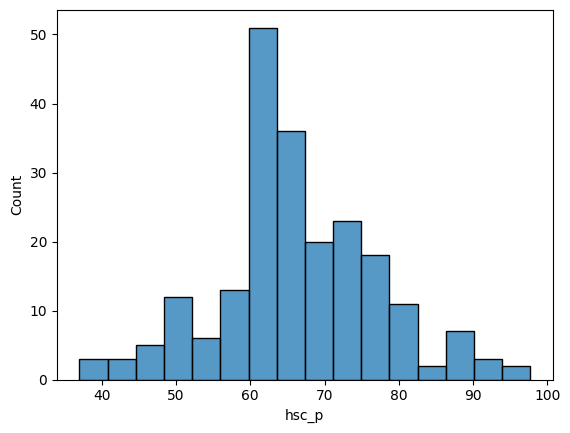

In [15]:
sns.histplot(data=dados, x='hsc_p')
plt.show()

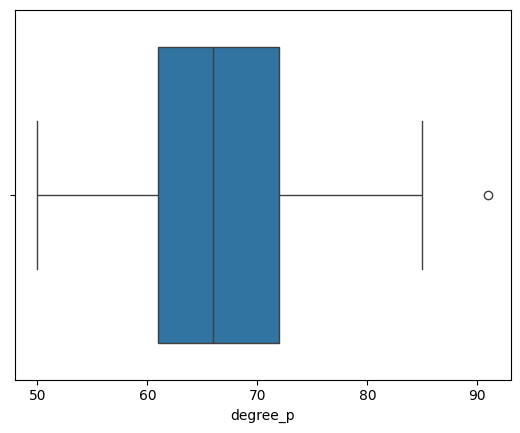

In [16]:
sns.boxplot(data=dados, x='degree_p')
plt.show()

<Axes: xlabel='degree_p', ylabel='Count'>

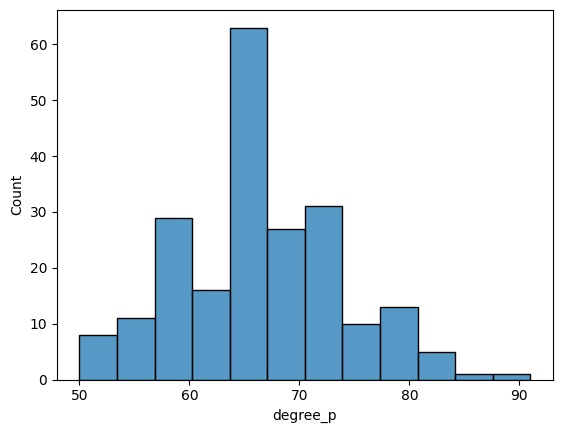

In [17]:
sns.histplot(data=dados, x='degree_p')

<Axes: xlabel='etest_p'>

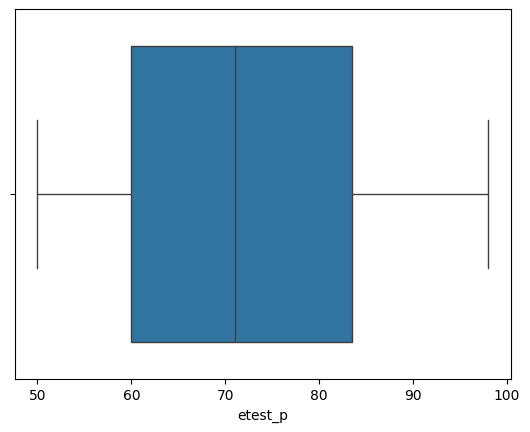

In [18]:
sns.boxplot(data=dados, x='etest_p')

<Axes: xlabel='mba_p'>

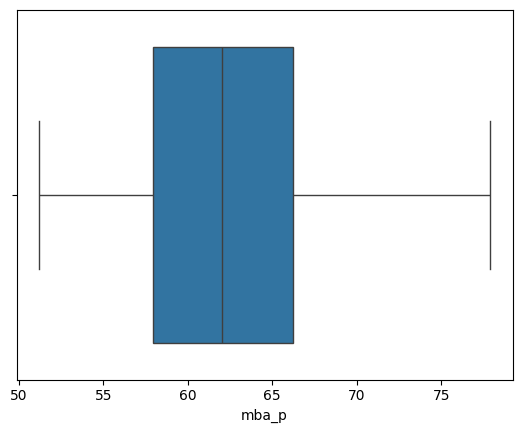

In [19]:
sns.boxplot(data=dados, x='mba_p')

<Axes: xlabel='salary'>

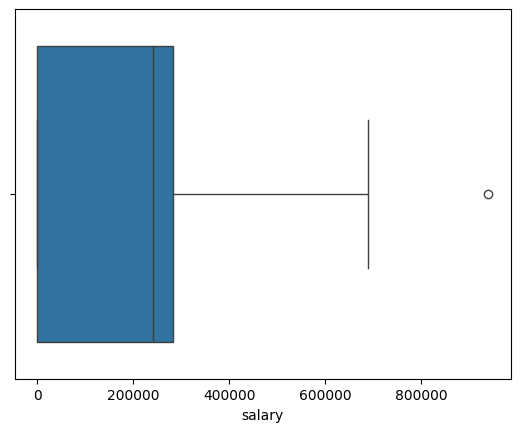

In [20]:
sns.boxplot(data=dados, x='salary')

<Axes: xlabel='salary', ylabel='Count'>

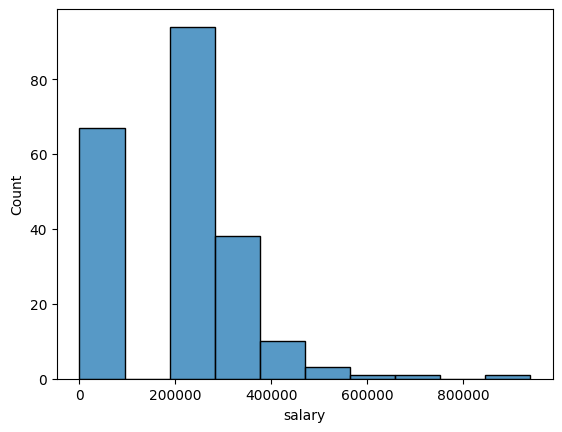

In [21]:
sns.histplot(data=dados, x='salary')

Será que os scores acadêmicos influenciam na contratação? E a experiência de trabalho?

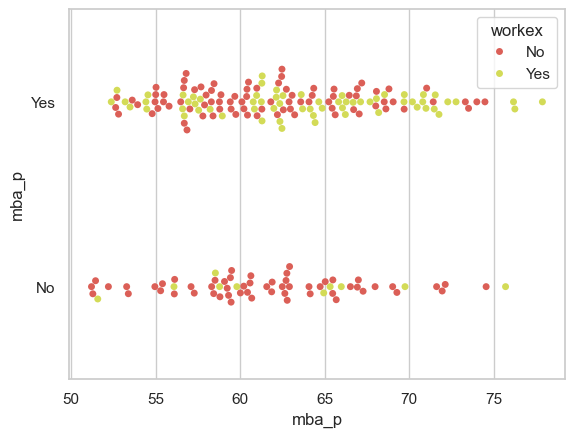

In [22]:
sns.set_theme(style='whitegrid', palette = 'hls')
ax=sns.swarmplot(data=dados, x='mba_p', y='status', hue='workex')
ax.set(ylabel= 'mba_p')
plt.show()


Inferência dos dados:

Podemos observar que a pontuação de MBA pode influência sim na decisão de contratação, temos um grande concetração de dados sobre profissionais que possuem score de mba_p e com esperiência de trabalho. 

Existe algum viés de gênero ao oferecer remuneração?

In [23]:
px.violin(data_frame=dados, x='specialisation', y='salary', color='gender', box=True, points='all')

#### Processamento dos dados

Técnica de Label Encoder

In [24]:
colunas = ['gender', 'workex', 'specialisation', 'status']

LabelEncoder = LabelEncoder()
for col in colunas:
    dados[col] = LabelEncoder.fit_transform(dados[col])

Técnica de One Hot Encoding

In [25]:
dummy_hsc_s = pd.get_dummies(dados['hsc_s'], prefix='dummy_hsc_s').astype('int64')
dummy_degree_t = pd.get_dummies(dados['degree_t'], prefix='dummy_degree_t').astype('int64')

dados_dummy = pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)

dados_dummy.drop(['hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [26]:
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_hsc_s_Arts,dummy_hsc_s_Commerce,dummy_hsc_s_Science,dummy_degree_t_Comm&Mgmt,dummy_degree_t_Others,dummy_degree_t_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


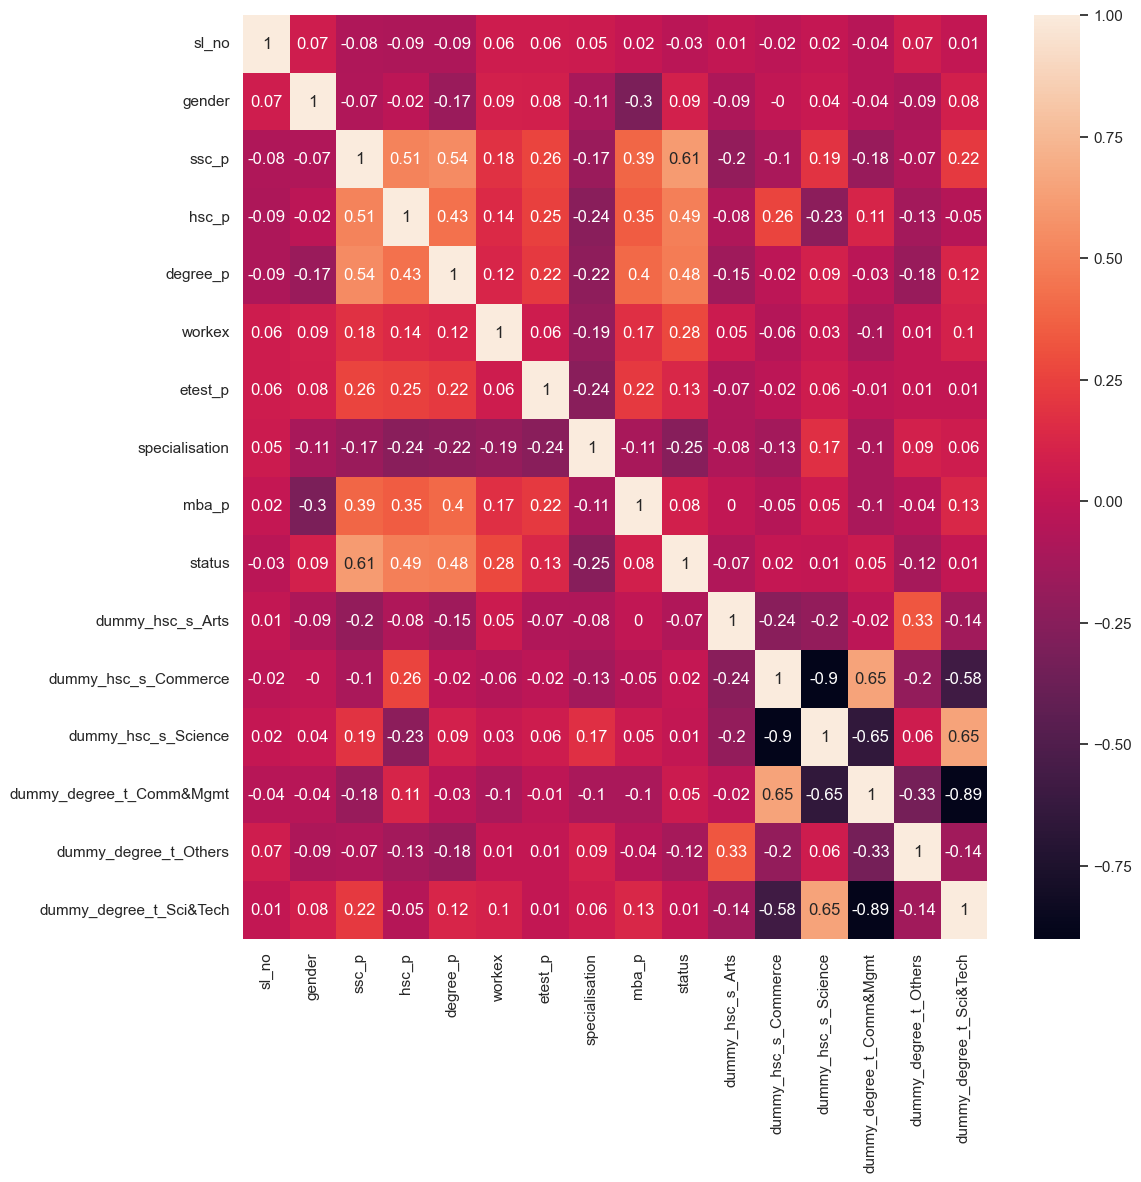

In [27]:
numeric_df = dados_dummy.select_dtypes(include=[np.number])
correlation_matriz = numeric_df.corr().round(2)

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=correlation_matriz, annot=True, ax=ax)
plt.show()

#### Construção do modelo KNN

In [28]:
# variáveis independentes
x = dados_dummy[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
# variável target
y = dados_dummy['status']

In [29]:
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


Padronizando as escalas

In [30]:
scaler = StandardScaler()

scaler.fit(x)

x = scaler.transform(x)

In [31]:
x

array([[-0.02808697,  2.2688123 , -1.14010225, -0.72444647, -0.59764672],
       [ 1.11336869,  1.10344799,  1.51326671,  1.38036423,  0.6876202 ],
       [-0.21323793,  0.15331275, -0.32284282, -0.72444647, -0.76947385],
       ...,
       [-0.02808697,  0.06133451,  0.90304633,  1.38036423,  1.27870553],
       [ 0.61994138, -0.03064373, -1.14010225, -0.72444647, -0.35193393],
       [-0.49096436, -0.76646966, -1.82115177, -0.72444647, -0.3536522 ]])

In [32]:
x_train_, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [43]:
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

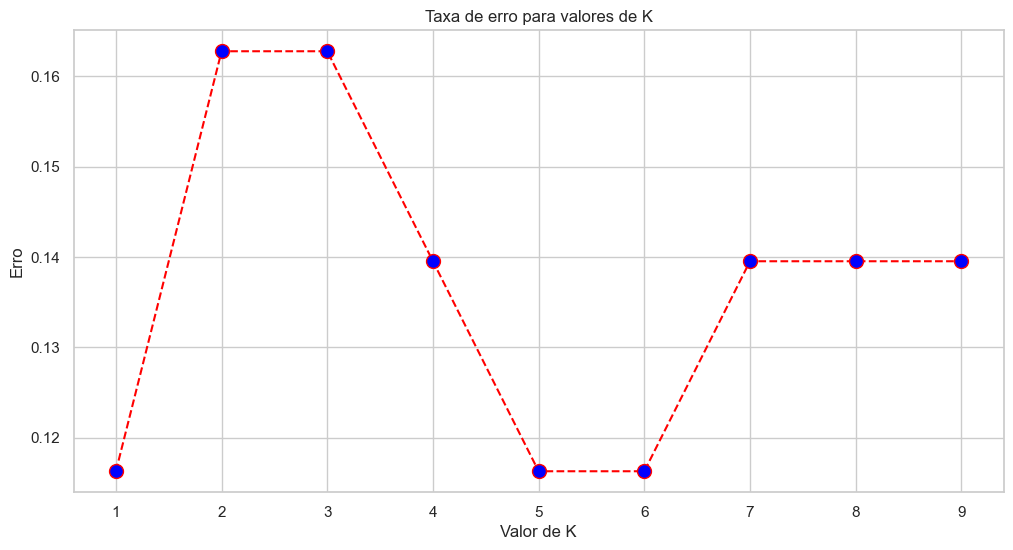

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro para valores de K')
plt.xlabel('Valor de K')
plt.ylabel('Erro')
plt.show()

Treinando o algoritimo

In [44]:
Model_classifier = KNeighborsClassifier(n_neighbors=5)
Model_classifier.fit(x_train_, y_train)

KNeighborsClassifier()

In [45]:
# predizendo os valores
y_pred = Model_classifier.predict(x_test)

#### Avaliando o algoritimo KNN

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.8837209302325582


#### Construção do modelo SVM

In [49]:
svm = Pipeline(
    [
        ('linear_svc', LinearSVC(C=1))
    ]
)

In [50]:
svm.fit(x_train_, y_train)

c:\Users\Igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [51]:
predic_svm = svm.predict(x_test)

In [52]:
accuracy = accuracy_score(y_test, predic_svm)
print(f'Acurácia: {accuracy}')

Acurácia: 0.8604651162790697
